In [1]:
library(tidyverse)
library(igraph)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Internal - 2020 

In [2]:
# Read graph from edges list
edges_int = read_csv("datasets/graph_int.csv", col_names = c("from", "to", "weight"), show_col_types = FALSE)
nodes_int = read_csv("datasets/nodes_int.csv", show_col_types = FALSE)
g <- graph_from_data_frame(edges_int, directed = FALSE, vertices = nodes_int)

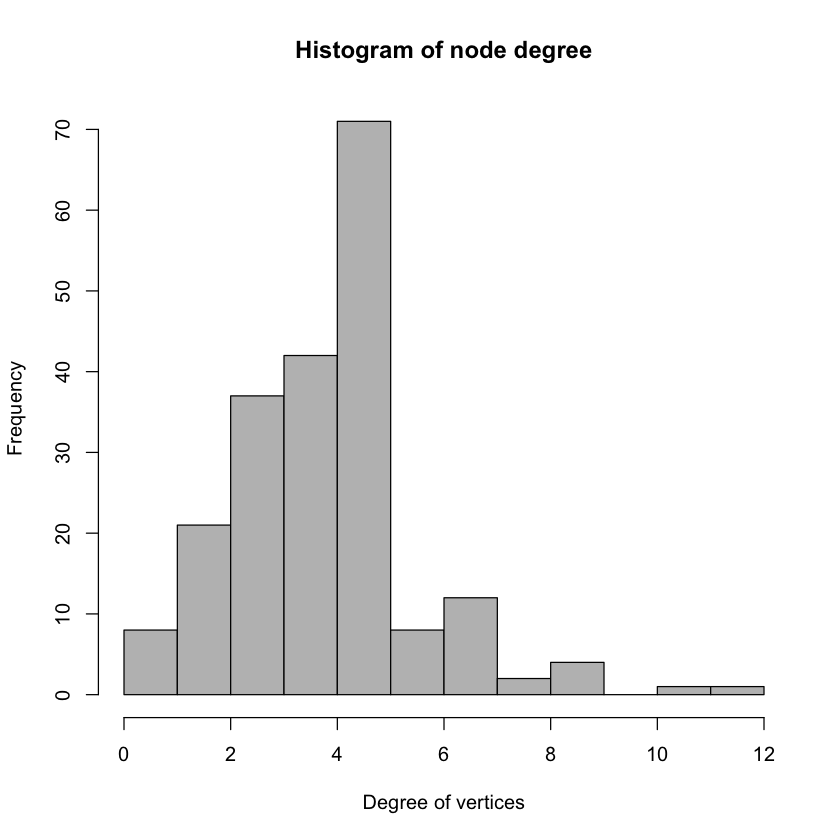

In [3]:
#Histogram of node degree
V(g)$degree <- degree(g)
hist(V(g)$degree,
     col="grey",
     main='Histogram of node degree',
     ylab='Frequency',
     xlab='Degree of vertices')

In [4]:
encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}
V(g)$color = encode_ordinal(V(g)$institutions)

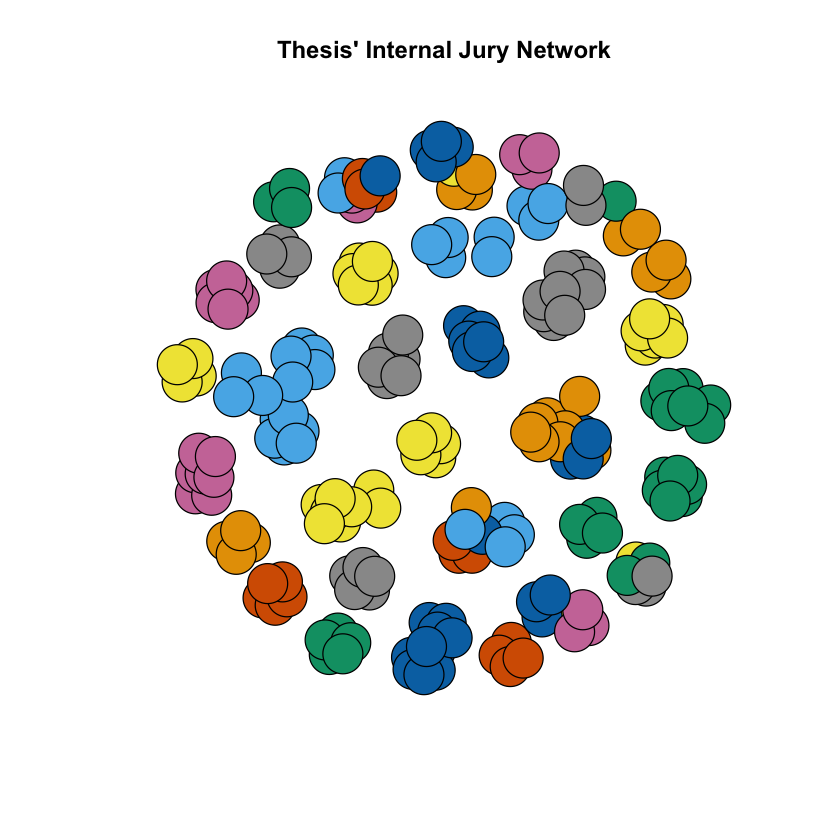

In [5]:
# Display graph
l <- layout_with_fr(g)
plot(g, layout=l,
     vertex.size = 15,
     vertex.label = NA,
     main = "Thesis' Internal Jury Network")

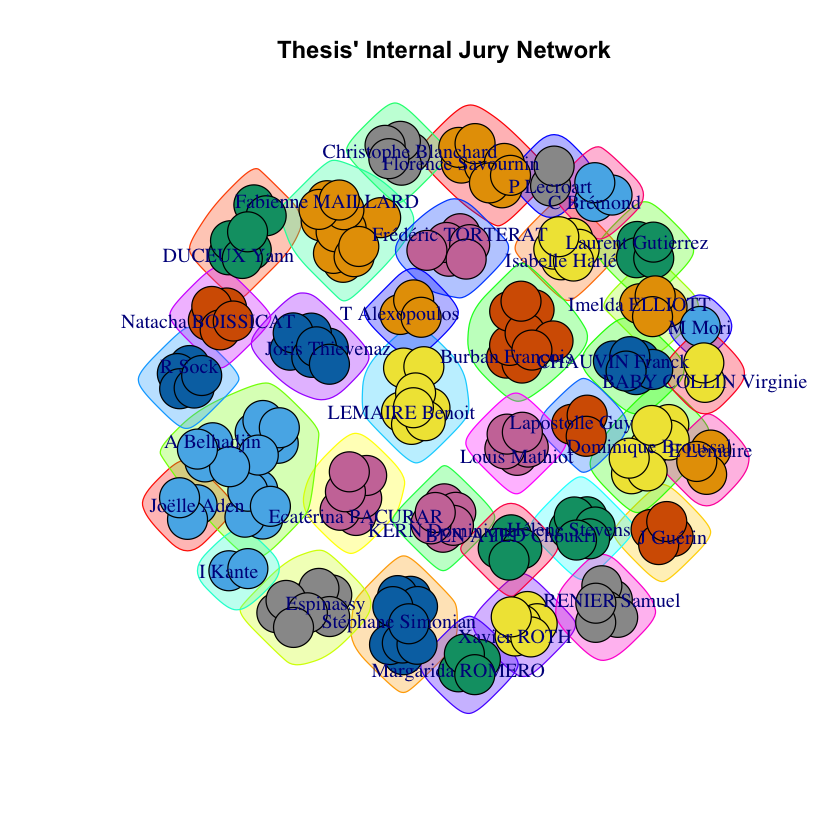

In [6]:
set.seed(2680)
# Community Detection - Louvain
lc <- cluster_louvain(g)
communities = as.data.frame(communities(lc))[,1]
vector <- character(length(communities))
for (i in 1:length(communities)) {
    vector[i] = unlist(communities[i])[1]
}

plot(lc, g,
     vertex.label = ifelse(V(g)$name %in% vector, V(g)$Name, NA),
     vertex.size = 15,
     vertex.label.cex = 1,
     vertex.label = NA,
     main = "Thesis' Internal Jury Network",
    )

## External - 2020

In [7]:
# Read graph from edges list
edges_ext = read_csv("datasets/graph_ext.csv", col_names = c("from", "to", "weight"), show_col_types = FALSE)
nodes_ext = read_csv("datasets/nodes_ext.csv", show_col_types = FALSE)
g <- graph_from_data_frame(edges_ext, directed = FALSE, vertices = nodes_ext)

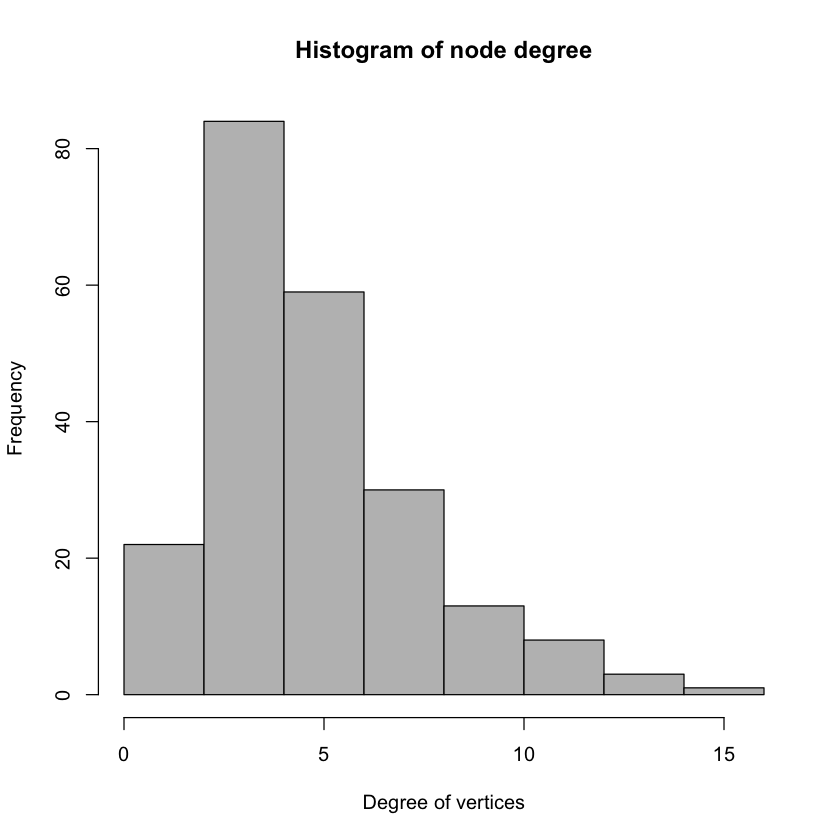

In [8]:
#Histogram of node degree
V(g)$degree <- degree(g)
hist(V(g)$degree,
     col="grey",
     main='Histogram of node degree',
     ylab='Frequency',
     xlab='Degree of vertices')

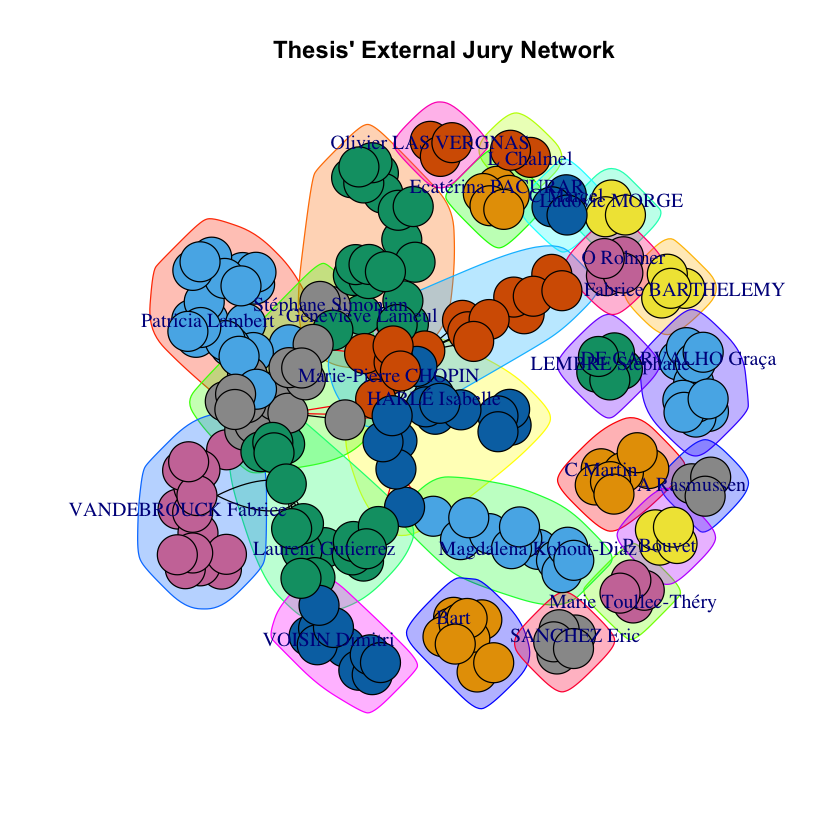

In [9]:
set.seed(2680)
# Community Detection - Louvain
lc <- cluster_louvain(g)
communities = as.data.frame(communities(lc))[,1]
vector <- character(length(communities))
for (i in 1:length(communities)) {
    vector[i] = unlist(communities[i])[1]
}

plot(lc, g,
     vertex.label = ifelse(V(g)$name %in% vector, V(g)$Name, NA),
     vertex.size = 15,
     vertex.label.cex = 1,
     vertex.label = NA,
     vertex.label.dist = 0,
     main = "Thesis' External Jury Network",
    )

## Bachelor Program

In [15]:

links <- data.frame(
  source = c("Bachelor 1", "Bachelor 1", "From Outside", "Bachelor 2", "Bachelor 2", "Bachelor 2", "Start of Exchange", "Bachelor 3", "Bachelor 3"),
  target = c("Bachelor 2", "Left Year 1", "Bachelor 2", "Bachelor 3", "Engineering School", "Left Year 2", "Bachelor 3", "Bachelor 4", "End of Exchange"),
  value = c(17, 9, 1, 12, 5, 1, 5, 13, 4)
  )

nodes <- data.frame(name = c(as.character(links$source), as.character(links$target)) %>% unique())


links$ID.source <- match(links$source, nodes$name) - 1
links$ID.target <- match(links$target, nodes$name) - 1


p <- sankeyNetwork(Links = links, Nodes = nodes, Source = "ID.source", Target = "ID.target", Value = "value", NodeID = "name", sinksRight = FALSE, fontSize = 12)

p


temp_graph <- graph.data.frame(links)
adjaceny.matrix <- get.adjacency(temp_graph, sparse = FALSE, attr= "value")

chordDiagram(adjaceny.matrix, transparency = 0.80, scale = TRUE, small.gap = 100)


ERROR: Error in sankeyNetwork(Links = links, Nodes = nodes, Source = "ID.source", : could not find function "sankeyNetwork"
